In [2]:
#IMPORTAMOS LOS MODULOS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar CSV
df_bank = pd.read_csv("bank-additional.csv")

# Cargar Excel
xls = pd.ExcelFile("customer-details.xlsx")

# Combinar todas las hojas del Excel
df_customers = pd.concat(
    [pd.read_excel(xls, sheet_name=sheet) for sheet in xls.sheet_names],
    ignore_index=True)




In [4]:
#Exploramos archivos

print("BANK DATASET")
print(df_bank.shape)         # nº filas y columnas
print(df_bank.columns)       # Nombres de columna (variables)
print(df_bank.info())        # Tipos de datos y nulos
print(df_bank.describe())    # Estadísticas generales
print(df_bank.head())        # Primeras filas



BANK DATASET
(43000, 24)
Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude', 'id_'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  in

In [5]:
print("CUSTOMER DETAILS")
print(df_customers.shape)
print(df_customers.columns)
print(df_customers.info())
print(df_customers.describe())
print(df_customers.head())

CUSTOMER DETAILS
(43170, 7)
Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB
None
         Unnamed: 0         Income       Kidhome      Teenhome  \
count  43170.000000   43170.000000  43170.000000  43170.000000   
mean    7916.022469   93227.389622   

In [6]:
#TRANSFORMACIÓN DE LOS TIPOS DE DATOS

# Convertir columnas con comas a float (sin modificar nulos)
cols_to_float = ['cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for col in cols_to_float:
    # Solo aplicar replace a valores tipo str, para no tocar los nulos (que no son str)
    df_bank[col] = df_bank[col].apply(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
    df_bank[col] = pd.to_numeric(df_bank[col], errors='coerce')

# Convertir columnas binarias a tipo int8 
binary_cols = ['default', 'housing', 'loan']
for col in binary_cols:
    df_bank[col] = df_bank[col].astype('Int8')  # permite nulos con tipo entero

# Convertir columnas categóricas
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome', 'y']
for col in cat_cols:
    df_bank[col] = df_bank[col].astype('category')



# Mostrar tipos para verificar
print(df_bank.dtypes)



Unnamed: 0           int64
age                float64
job               category
marital           category
education         category
default               Int8
housing               Int8
loan                  Int8
contact           category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
y                 category
date                object
latitude           float64
longitude          float64
id_                 object
dtype: object


In [7]:
# Ver valores nulos por columna en bank-additional
#print("Valores nulos en df_bank:")
print(df_bank.isnull().sum())

Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64


In [8]:
# Ver valores nulos por columna en customer-details
print("\nValores nulos en df_customers:")
print(df_customers.isnull().sum())


Valores nulos en df_customers:
Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64


In [9]:
# Calcular el porcentaje de valores nulos por columna
missing_percentage = (df_bank.isnull().sum() / len(df_bank)) * 100

# Redondear para que sea más legible
missing_percentage = missing_percentage.round(2)

# Mostrar los resultados ordenados de mayor a menor
print(missing_percentage.sort_values(ascending=False))

euribor3m         21.53
default           20.89
age               11.91
education          4.20
loan               2.39
housing            2.39
cons.price.idx     1.10
job                0.80
date               0.58
marital            0.20
Unnamed: 0         0.00
contact            0.00
pdays              0.00
previous           0.00
campaign           0.00
duration           0.00
emp.var.rate       0.00
poutcome           0.00
nr.employed        0.00
cons.conf.idx      0.00
y                  0.00
latitude           0.00
longitude          0.00
id_                0.00
dtype: float64


In [10]:
# Imputación para df_bank

# 1. Imputar valores numéricos con mediana 
df_bank['age'] = df_bank['age'].fillna(df_bank['age'].median())
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].fillna(df_bank['cons.price.idx'].median())
df_bank['euribor3m'] = df_bank['euribor3m'].fillna(df_bank['euribor3m'].median())


# 2. Imputar valores categóricos o binarios con la moda (valor más frecuente)
df_bank['education'] = df_bank['education'].fillna(df_bank['education'].mode()[0])
df_bank['loan'] = df_bank['loan'].fillna(df_bank['loan'].mode()[0])
df_bank['housing'] = df_bank['housing'].fillna(df_bank['housing'].mode()[0])

# 3. Eliminar columna 'default' si no aporta mucho valor y tiene muchos nulos
df_bank = df_bank.drop(columns=['default'])

# Verificar que ya no haya nulos
print("\nValores nulos restantes:")
print(df_bank.isnull().sum()[df_bank.isnull().sum() > 0])



Valores nulos restantes:
job        345
marital     85
date       248
dtype: int64


In [11]:
#Gestion de duplicados
num_duplicados = df_bank.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicados}")



Número de filas duplicadas: 0


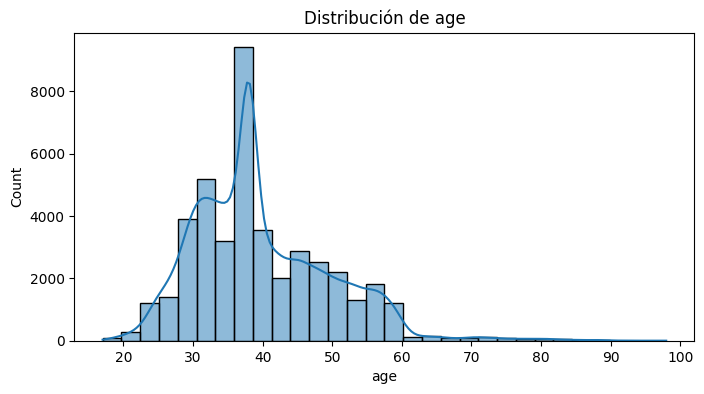

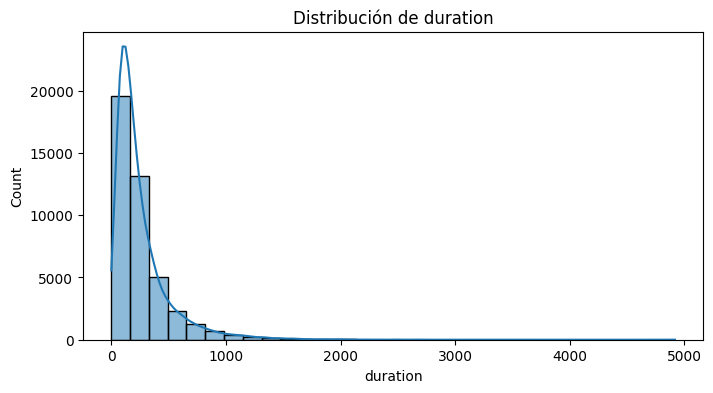

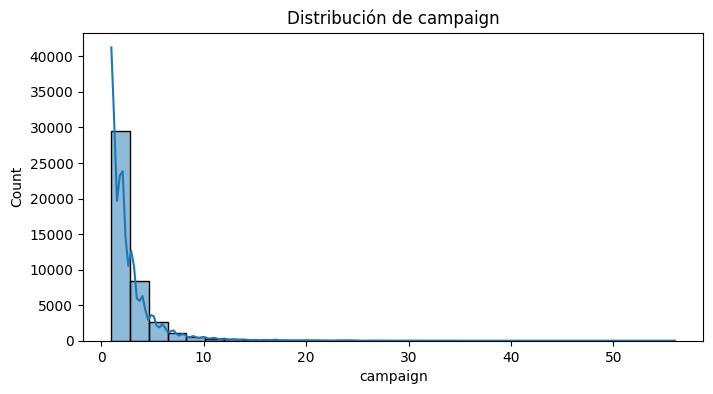

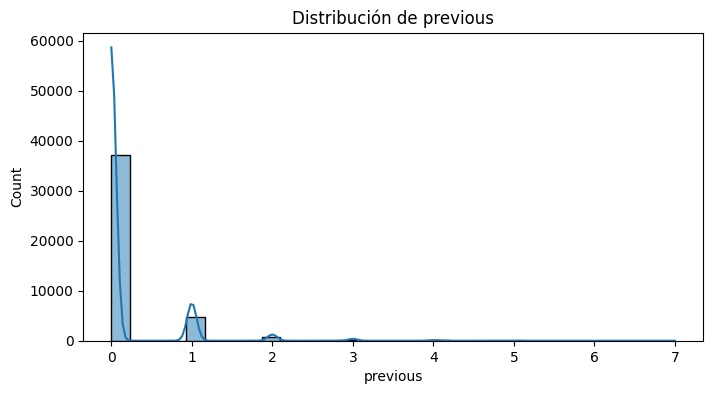

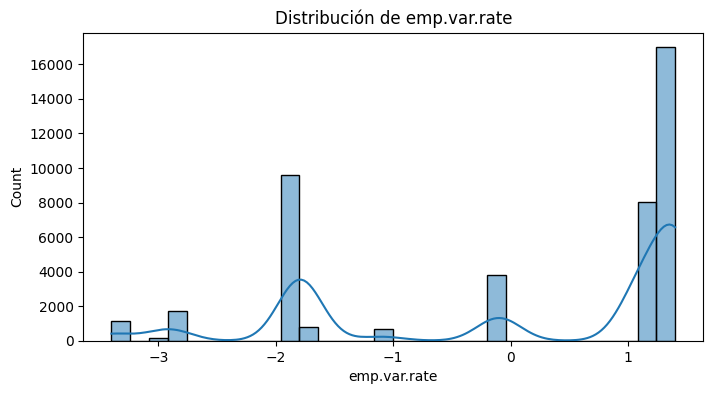

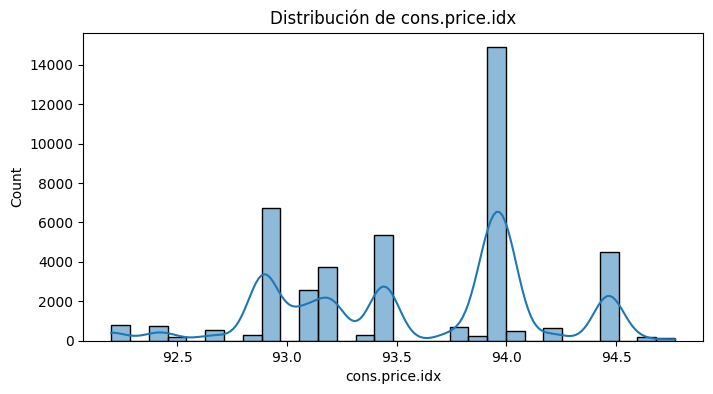

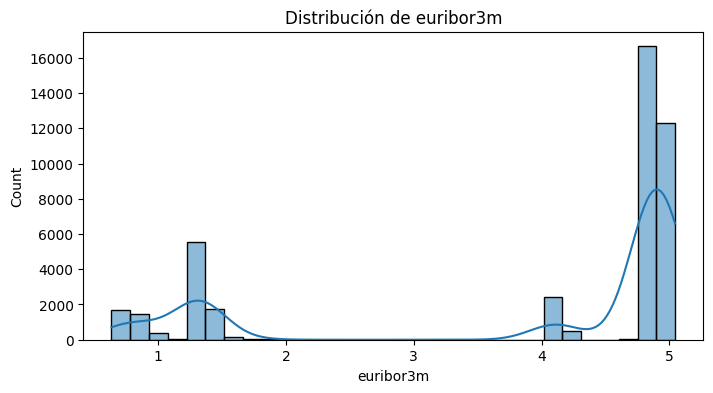

In [12]:
#Visualización de los datos

# 1. Distribución de variables numéricas
num_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_bank[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()




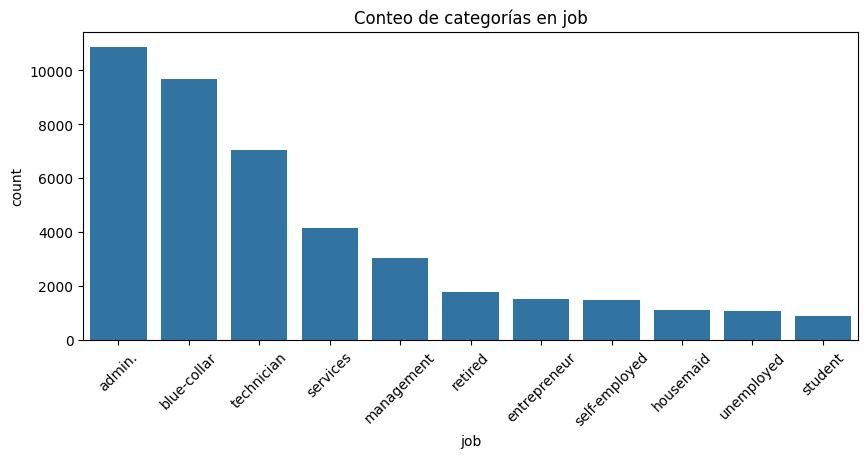

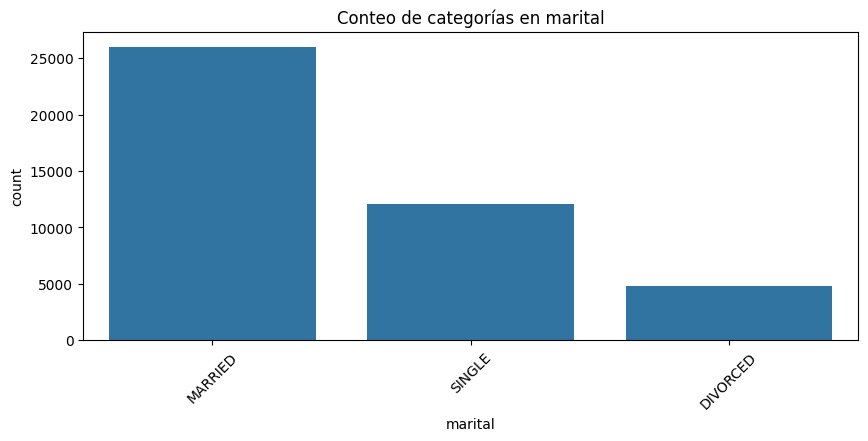

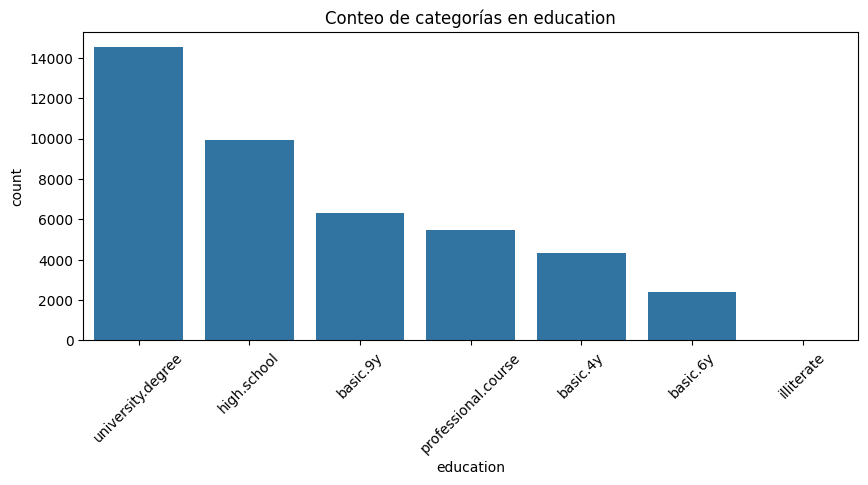

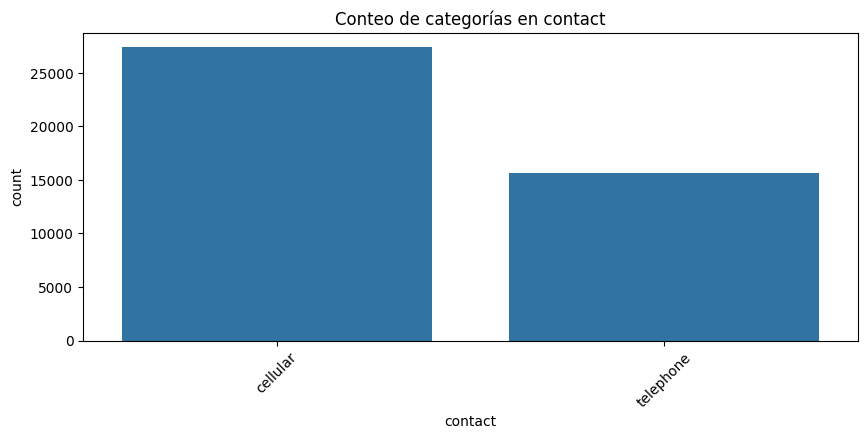

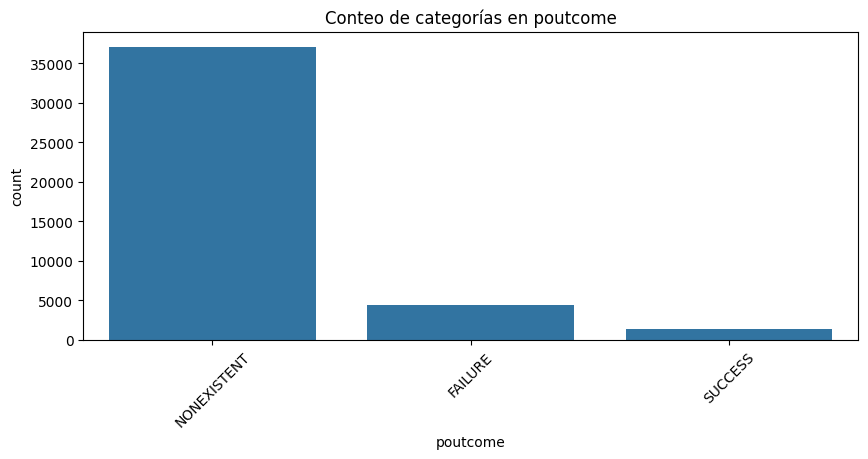

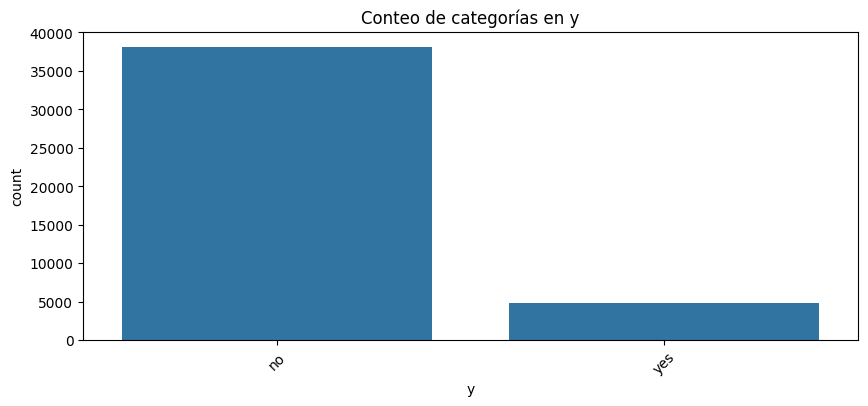

In [13]:
# 2. Conteo de categorías en variables categóricas
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome', 'y']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df_bank, x=col, order=df_bank[col].value_counts().index)
    plt.title(f'Conteo de categorías en {col}')
    plt.xticks(rotation=45)
    plt.show()



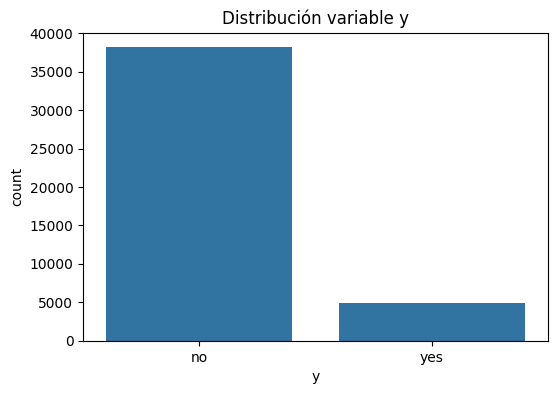

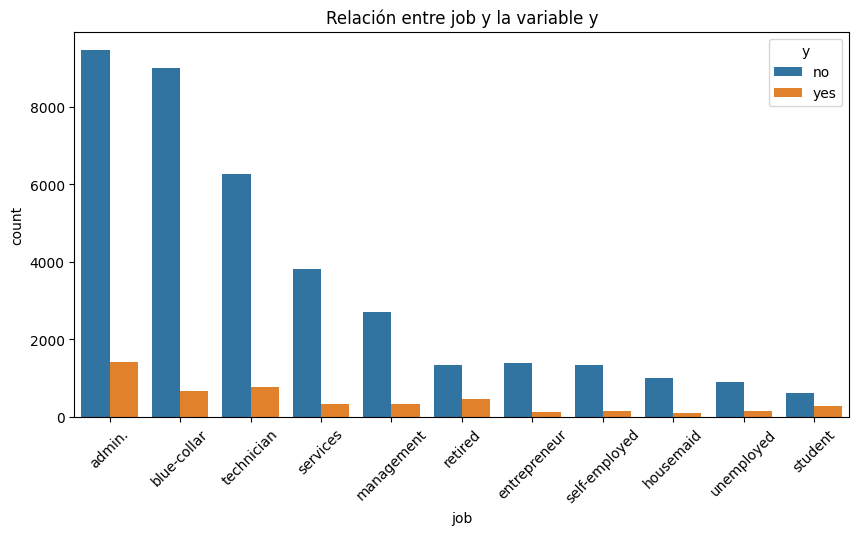

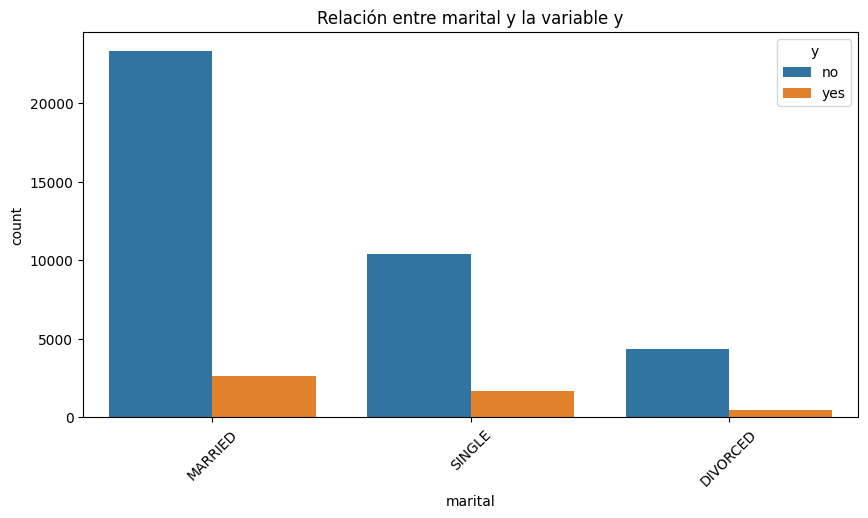

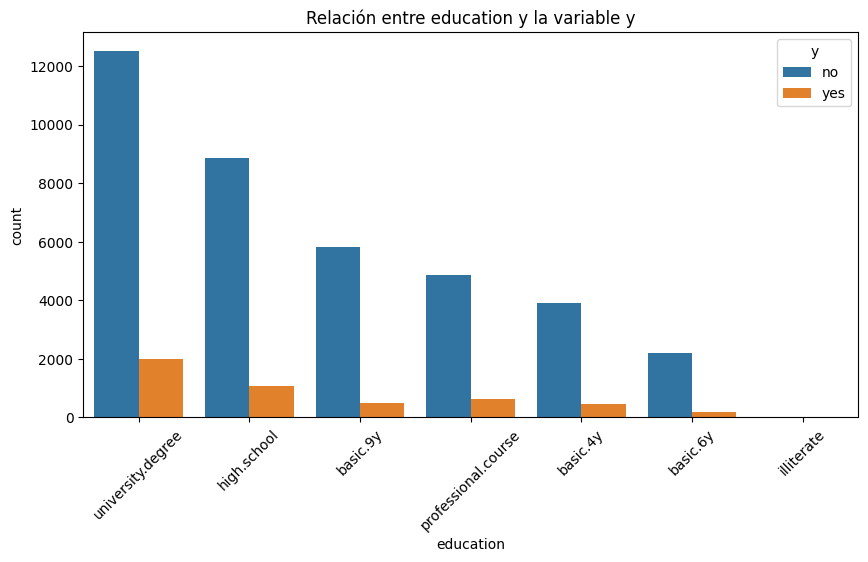

In [14]:
# 3. Relación entre variable objetivo 'y' y algunas variables clave
plt.figure(figsize=(6,4))
sns.countplot(data=df_bank, x='y')
plt.title('Distribución variable y')
plt.show()

for col in ['job', 'marital', 'education']:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_bank, x=col, hue='y', order=df_bank[col].value_counts().index)
    plt.title(f'Relación entre {col} y la variable y')
    plt.xticks(rotation=45)
    plt.show()


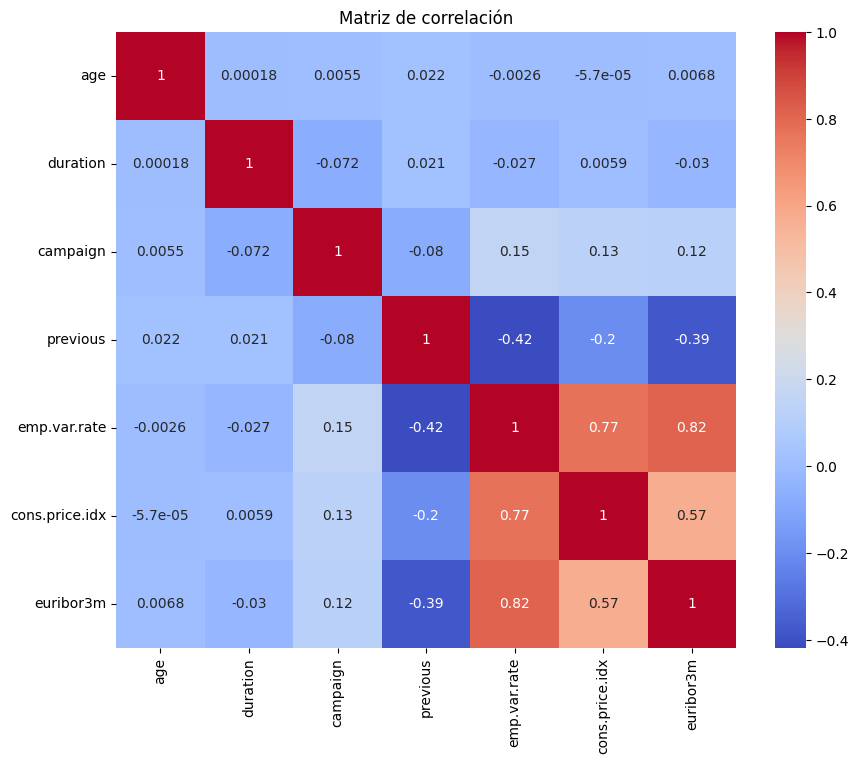

In [ ]:
# 4. Correlación entre variables numéricas
plt.figure(figsize=(10,8))
sns.heatmap(df_bank[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

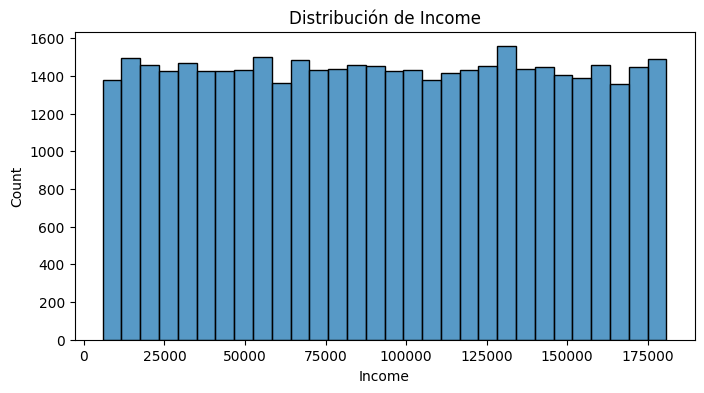

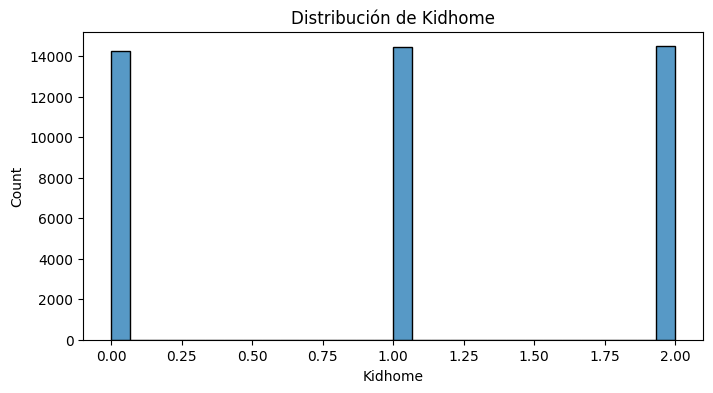

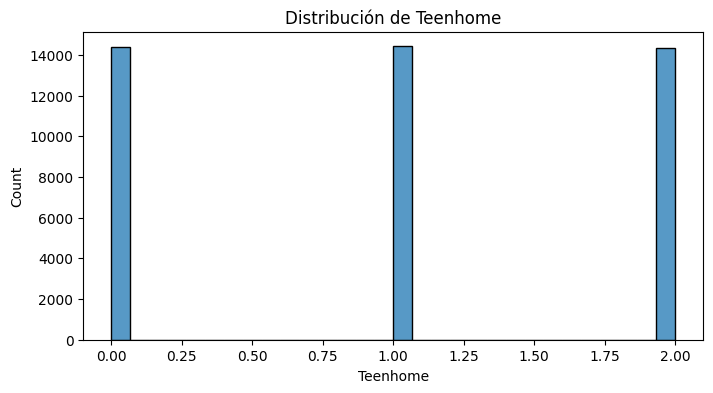

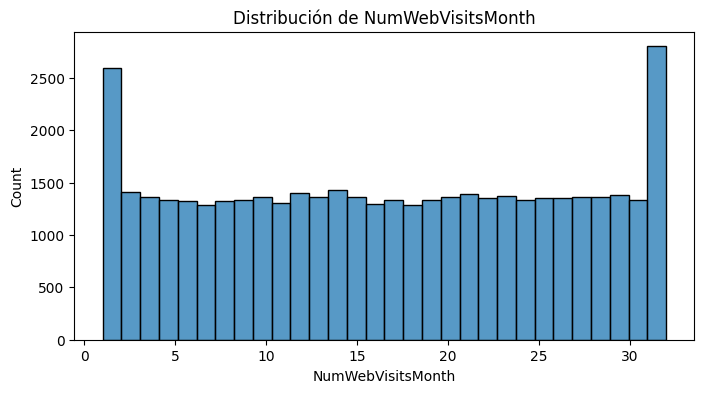

In [16]:
#ARCHIVO CUSTOMERS

# Histograma para variables numéricas
num_cols = ['Income', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth']

for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df_customers[col], bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()



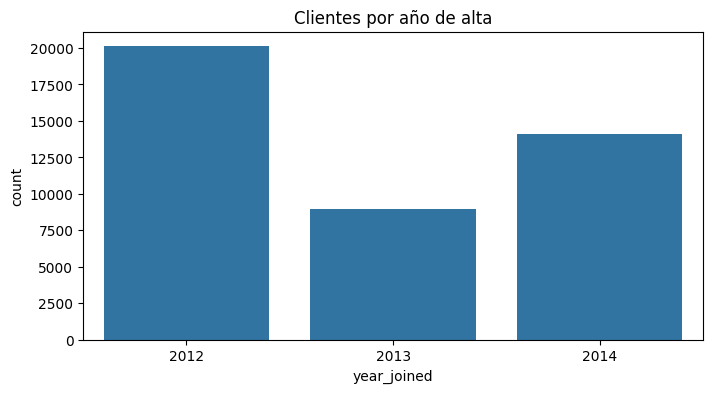

In [17]:
# Analizar la fecha de alta del cliente
df_customers['year_joined'] = df_customers['Dt_Customer'].dt.year

# Ver distribución por año
plt.figure(figsize=(8,4))
sns.countplot(x='year_joined', data=df_customers)
plt.title('Clientes por año de alta')
plt.show()

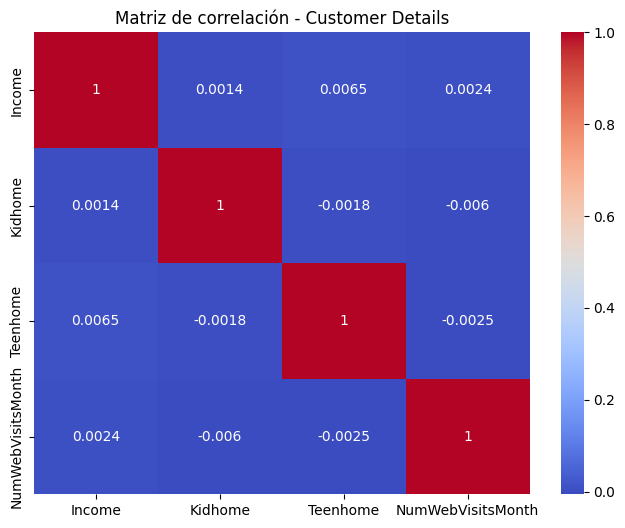

In [18]:
# Seleccionar solo las columnas numéricas relevantes
corr_cols = ['Income', 'Kidhome', 'Teenhome', 'NumWebVisitsMonth']

# Crear la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(df_customers[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación - Customer Details')
plt.show()

In [19]:
#UNIMOS ARCHIVOS 

df_merged = df_bank.merge(df_customers, left_on='id_', right_on='ID', how='inner')

print(df_merged.shape) #forma del archivo
df_merged.head() #muestra 5 primeras filas



(43000, 31)


,Unnamed: 0_x,age,job,marital,education,housing,loan,contact,duration,campaign,...,longitude,id_,Unnamed: 0_y,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,year_joined
0,0,38.0,housemaid,MARRIED,basic.4y,0,0,telephone,261,1,...,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,2012
1,1,57.0,services,MARRIED,high.school,0,0,telephone,149,1,...,-83.923,e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2012
2,2,37.0,services,MARRIED,high.school,1,0,telephone,226,1,...,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012
3,3,40.0,admin.,MARRIED,basic.6y,0,0,telephone,151,1,...,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,2012
4,4,56.0,services,MARRIED,high.school,0,1,telephone,307,1,...,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012


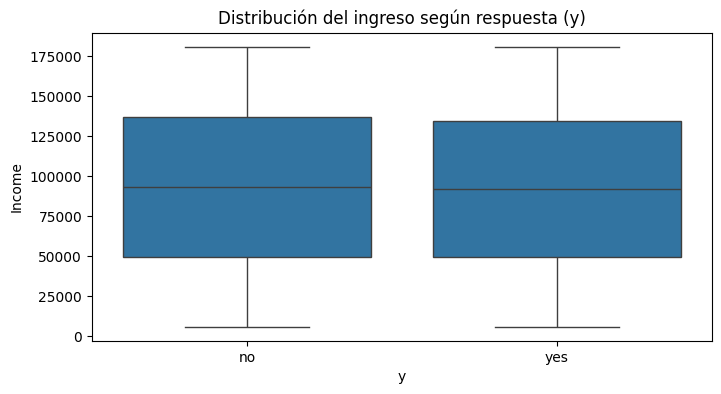

In [23]:
# Relación entre Income y variable objetivo
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_merged, x='y', y='Income')
plt.title('Distribución del ingreso según respuesta (y)')
plt.show()

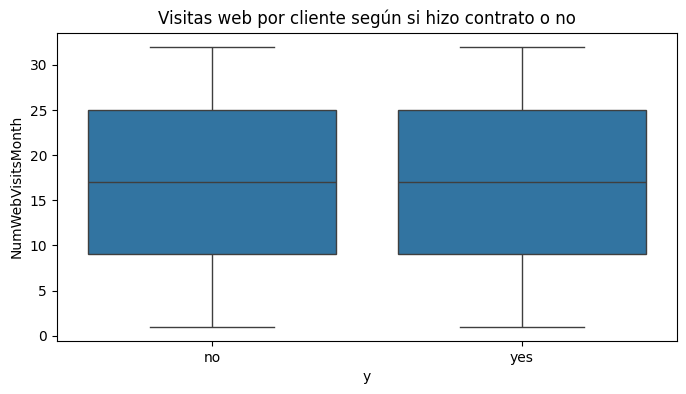

In [24]:
# Distribución de visitas web por resultado
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_merged, x='y', y='NumWebVisitsMonth')
plt.title('Visitas web por cliente según si hizo contrato o no')
plt.show()

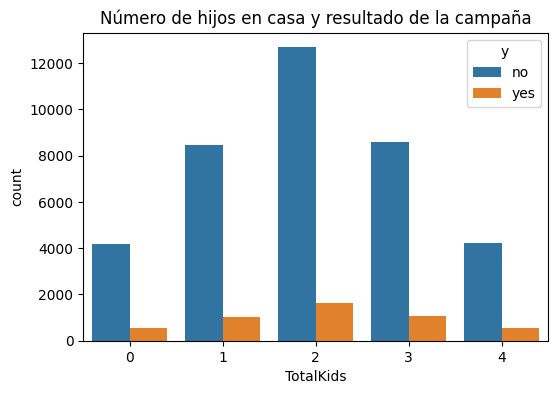

In [25]:
# Hijos en casa vs respuesta
plt.figure(figsize=(6, 4))
df_merged['TotalKids'] = df_merged['Kidhome'] + df_merged['Teenhome']
sns.countplot(data=df_merged, x='TotalKids', hue='y')
plt.title('Número de hijos en casa y resultado de la campaña')
plt.show()

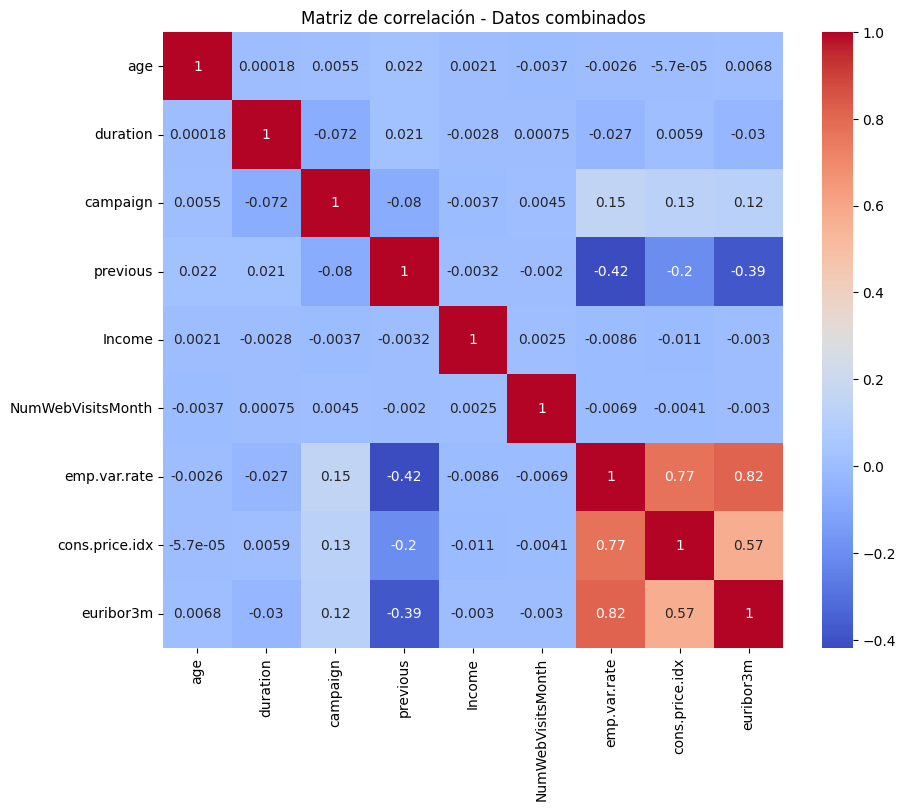

In [ ]:
# Selecciona las columnas numéricas
num_cols = ['age', 'duration', 'campaign', 'previous', 'Income',
            'NumWebVisitsMonth', 'emp.var.rate', 'cons.price.idx', 'euribor3m']

# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_merged[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación - Datos combinados')
plt.show()
